In [1]:
import numpy as np
from collections import defaultdict
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re

from experiment_code.visualization.visualize import CoRTLanguageExp
from experiment_code.visualization.visualize import EnglishVerif

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [2]:
cort = CoRTLanguageExp()

In [3]:
df = cort.load_dataframe()

In [4]:
df_grouped = df.query('correct==1 and trial_type=="meaningful"')
grouped_table = pd.pivot_table(df_grouped, values=['rt'], index=['spreadsheet_row'], columns=['CoRT_descript', 'group'], #'cloze_descript'
                                aggfunc= {np.mean, np.std}).reset_index()
# join multilevel columns
grouped_table.columns = ["_".join(pair) for pair in grouped_table.columns]
grouped_table.columns = grouped_table.columns.str.strip('_')
#should be ~320 rows
#can add in columns?

In [50]:
def rt_difs(df):
    df['cort_dif'] = df['rt_mean_CoRT_patient']-df['rt_mean_CoRT_control']
    df['non-cort_dif'] = df['rt_mean_non-CoRT_patient']-df['rt_mean_non-CoRT_control']
    return df
    #print("\nDifference of patient and control scores :\n", df)
grouped_table = rt_difs(grouped_table)

In [51]:
def outlier_sentences(df):
    return df.loc[(df['cort_dif']>= 220) | (df['non-cort_dif']>= 220)] 
df_outliers = outlier_sentences(grouped_table)
#len(df_outliers[df_outliers['cort_dif'].isna()])
print("CoRT RT difference range is ", df_outliers["cort_dif"].min(), df_outliers["cort_dif"].max())
print("Non-CoRT RT difference range is ",df_outliers["non-cort_dif"].min(), df_outliers["non-cort_dif"].max())

CoRT RT difference range is  220.1314963434021 367.3190396759361
Non-CoRT RT difference range is  220.07386637237983 429.56943607912035


In [46]:
df_outliers.count()

spreadsheet_row             90
rt_mean_CoRT_control        45
rt_mean_CoRT_patient        45
rt_mean_non-CoRT_control    45
rt_mean_non-CoRT_patient    45
rt_std_CoRT_control         45
rt_std_CoRT_patient         45
rt_std_non-CoRT_control     45
rt_std_non-CoRT_patient     45
cort_dif                    45
non-cort_dif                45
dtype: int64

In [20]:
outliers = df_outliers["spreadsheet_row"].tolist()
df_new = df[df["spreadsheet_row"].isin(outliers)]
#df_new.columns
#len(df_new.spreadsheet_row.unique())
#maybe group sentences -- can use make_grouped_sentences_dataframe (or create similar func)


#df.filter(items = "outliers", like = "spreadsheet_row") 
#pass in row indices - PREFER
#pd.merge(df_outliers, df, how='left', left_index='spreadsheet_row')
#reset index to be spreadsheet row

In [21]:
df_by_sentence = df_new.groupby(['full_sentence', 'target_word', 'cloze_descript', 'CoRT_descript', 'cause_effect', 'dynamic_verb', 
                                 'orientation', 'negative', 'tense']).agg({'correct': ['mean', 'std'], 'rt': ['mean', 'std']}).reset_index()

# join multilevel columns
df_by_sentence.columns = ["_".join(pair) for pair in df_by_sentence.columns]
df_by_sentence.columns = df_by_sentence.columns.str.strip('_')
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_by_sentence

,full_sentence,target_word,cloze_descript,CoRT_descript,cause_effect,dynamic_verb,orientation,negative,tense,correct_mean,correct_std,rt_mean,rt_std
0,Abby|stuck|his|picture|to|her|wall|with|a,tack,low cloze,CoRT,no,yes,person,no,past,0.966667,0.182574,928.451667,284.684113
1,"After|hitting|the|iceberg,|the|ship|began|to",sink,high cloze,CoRT,yes,yes,object,no,past,0.966667,0.182574,788.618882,336.812608
2,After|missing|lunch|Harry|badly|needed|some,food,high cloze,non-CoRT,yes,yes,person,no,past,1.000000,0.000000,740.191658,240.106311
3,"After|returning|home,|Sharon|hung|her|jacket|o...",hook,low cloze,CoRT,yes,yes,person,no,past,0.966667,0.182574,833.310497,284.949638
4,"After|speaking,|Allen|left|the|noisy",room,high cloze,CoRT,yes,yes,person,no,past,0.966667,0.182574,960.307337,408.259325
5,"After|swallowing|too|quickly,|Simon|began|to",choke,high cloze,CoRT,yes,yes,person,no,past,0.966667,0.182574,807.029662,314.893608
6,"After|washing|his|hands,|Brandon|dried|them|wi...",towel,high cloze,CoRT,yes,yes,person,no,past,1.000000,0.000000,784.491485,252.663253
7,Alexander|just|knew|that|he|would|win|the|big,prize,low cloze,non-CoRT,no,yes,person,no,past,1.000000,0.000000,793.647680,199.549152
8,All|the|professional|athlete|wanted|was|a|back,rub,low cloze,non-CoRT,no,no,person,no,past,1.000000,0.000000,928.803842,252.236850
9,Ana|accidentally|tripped|and|fell|down|the,stairs,high cloze,CoRT,yes,yes,person,no,past,1.000000,0.000000,822.689669,252.540152


In [27]:
df_by_sentence_cort = df_by_sentence.query('CoRT_descript == "CoRT"')

In [39]:
df_by_sentence_cort['cause_effect'].value_counts()
#more no's when both conditions; more yes's when only CoRT

yes    26
no     19
Name: cause_effect, dtype: int64

In [32]:
df_by_sentence_cort['dynamic_verb'].value_counts()

yes    45
Name: dynamic_verb, dtype: int64

In [33]:
df_by_sentence_cort['orientation'].value_counts()

person    34
group      5
object     5
animal     1
Name: orientation, dtype: int64

In [37]:
df_by_sentence_cort['tense'].value_counts()

past    45
Name: tense, dtype: int64

In [35]:
df_by_sentence_cort['negative'].value_counts()

no     44
yes     1
Name: negative, dtype: int64

In [29]:
eng = EnglishVerif()

In [30]:
df_eng = eng.load_dataframe()

In [31]:
#df_eng = relabel_part_id(df_eng)

In [32]:
#df_eng = df_eng[df_eng.participant_id != 8]

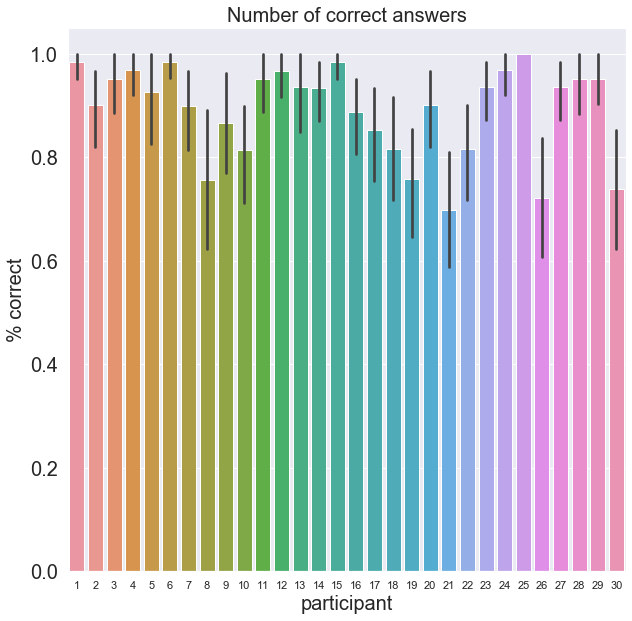

In [33]:
eng.participant_accuracy(df_eng)

In [34]:
def relabel_part_id(dataframe):
    # get all values of participant id
    old_id = dataframe['participant_id'].values

    # get new values of participant id
    temp = defaultdict(lambda: len(temp))
    res = [temp[ele] for ele in old_id]

    # assign new participant id to dataframe
    dataframe['participant_id'] = np.array(res) + 1
    
    return dataframe

In [35]:
#df = relabel_part_id(df)

In [36]:
def remove_bad_subjs(dataframe, bad_subjs):
    return dataframe[~dataframe['participant_id'].isin(bad_subjs)]

In [37]:
#df = remove_bad_subjs(df, bad_subjs = [8])
#df['participant_id'].unique

In [38]:
#df = df[df.participant_id != [8, 15]]

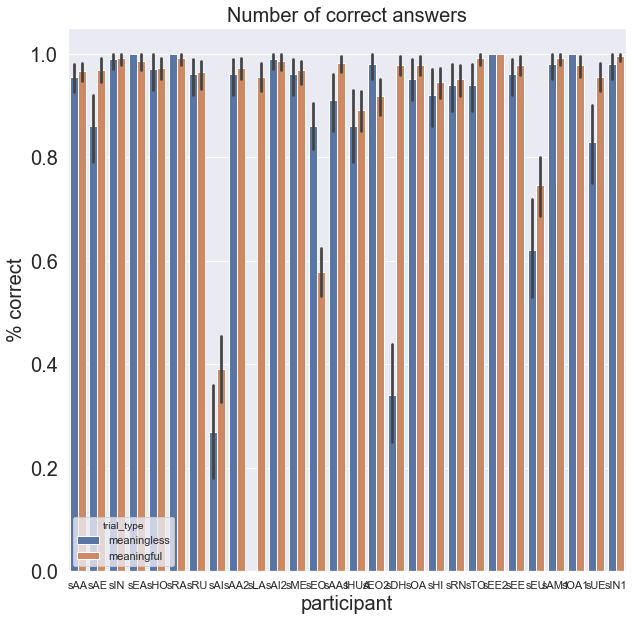

Answers mean: 0.8990625


In [39]:
cort.participant_accuracy(df, hue = "trial_type")

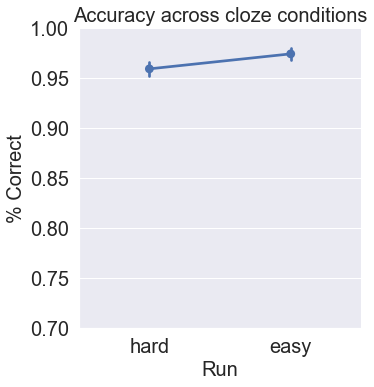

In [40]:
cort.accuracy_by_condition(df)

## Unfinished visualization functions

In [41]:
df.query('participant_id ==9')

#why only 3 blocks for participant #9? -> response type query
#need 'timelimit_screen'
#helpful but other problem - participant 10 w/ low accuracy, not 9

,local_date,experiment_id,experiment_version,participant_id,participant_private_id,task_name,task_version,spreadsheet_version,spreadsheet_row,sentence_num,...,orientation,negative,tense,spelling_modified,trial_type,version,version_descript,group_condition_name,group_CoRT_condition,group_trial_type


In [50]:
grouped_df = df.groupby(['participant_id', 'block_num']).mean()
grouped_df

experiment_id  experiment_version  \
participant_id block_num                                      
sAA            1.0              22813.0                 4.0   
               2.0              22813.0                 4.0   
               3.0              22813.0                 4.0   
               4.0              22813.0                 4.0   
               5.0              22813.0                 4.0   
...                                 ...                 ...   
sUE            1.0              23648.0                 5.0   
               2.0              23648.0                 5.0   
               3.0              23648.0                 5.0   
               4.0              23648.0                 5.0   
               5.0              23648.0                 5.0   

                          participant_private_id  task_version  \
participant_id block_num                                         
sAA            1.0                     1850909.5          36.5   
               2.0                     1850909.5          36.5   
               3.0                     1850909.5          36.5   
               4.0                     1850909.5          36.5   
               5.0                     1850909.5          36.5   
...                                          ...           ...   
sUE            1.0                     2083185.0          39.0   
               2.0                     2083185.0          39.0   
               3.0                     2083185.0          39.0   
               4.0                     2083185.0          39.0   
               5.0                     2083185.0          39.0   

                          spreadsheet_row          rt  attempt   correct  \
participant_id block_num                                                   
sAA            1.0                  286.0  765.376914      1.0  0.945312   
               2.0                   58.5  725.819539      1.0  0.976562   
               3.0                  156.0  699.906836      1.0  0.960938   
               4.0                  286.0  719.126008      1.0  0.945312   
               5.0                  156.0  704.865703      1.0  0.984375   
...                                   ...         ...      ...       ...   
sUE            1.0                  188.5  801.823125      1.0  0.843750   
               2.0                   58.5  814.012859      1.0  0.968750   
               3.0                  318.5  861.117734      1.0  0.953125   
               4.0                  253.5  900.122453      1.0  0.875000   
               5.0                  123.5  771.174172      1.0  0.937500   

                          incorrect  randomise_blocks  CoRT_mean  CoRT_std  \
participant_id block_num                                                     
sAA            1.0         0.054688               4.5   2.952548  0.842798   
               2.0         0.023438               1.0   2.989583  0.844400   
               3.0         0.039062               2.5   2.953925  0.885098   
               4.0         0.054688               4.5   2.952548  0.842798   
               5.0         0.015625               2.5   2.953925  0.885098   
...                             ...               ...        ...       ...   
sUE            1.0         0.156250               3.0   2.957626  0.882357   
               2.0         0.031250               1.0   2.989583  0.844400   
               3.0         0.046875               5.0   2.896243  0.840926   
               4.0         0.125000               4.0   3.008854  0.844669   
               5.0         0.062500               2.0   2.950223  0.887840   

                          cloze_probability  word_count  version  
participant_id block_num                                          
sAA            1.0                 0.635000    8.179688     10.5  
               2.0                 0.649688    8.218750     10.5  
               3.0                 0.645313    8.218750     10.5  
        

In [56]:
#rate of change across blocks (1-5)

#need more familiarity with multiindexing

grouped_df['rt_slope'] = df.groupby(['participant_id', 'block_num']).apply(lambda x: x['rt'].iloc[0] - x['rt'].iloc[4]/x['block_num'])
grouped_df.array

<PandasArray>
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     -6.229999940842276,
                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [23]:
#df['rt_slope']=(df['rt']-df['rt'].iloc[0])/df['cloze_probability']

#groupby subject
#df[['participant_id','block_num','rt']]


grouped_df['rt_slope']=(df['rt']-df['rt'].iloc[0])/df['block_num']
#df['rt_slope']

#calc first and last trial 

ValueError: cannot reindex from a duplicate axis

In [53]:
grouped_df = df.groupby(['participant_id', 'block_num']).mean()
grouped_df['rt_slope']= (grouped_df['rt'].iloc[0] - grouped_df['rt'].iloc[4])/df['block_num']

ValueError: cannot reindex from a duplicate axis

In [57]:
#plotting every dataframe - first group by subjects (above)
sns.set(rc={'figure.figsize':(20,10)})

sns.catplot(x="condition_name", y="rt", hue='group', kind = 'box', data=df.query('correct==1 and trial_type=="meaningful"'))
plt.xlabel('Cloze Condition', fontsize=20),
plt.ylabel('Reaction Time', fontsize=20)
plt.title('Average reaction time between cloze conditions', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15);

plt.show()

ValueError: Could not interpret input 'rt_slope'

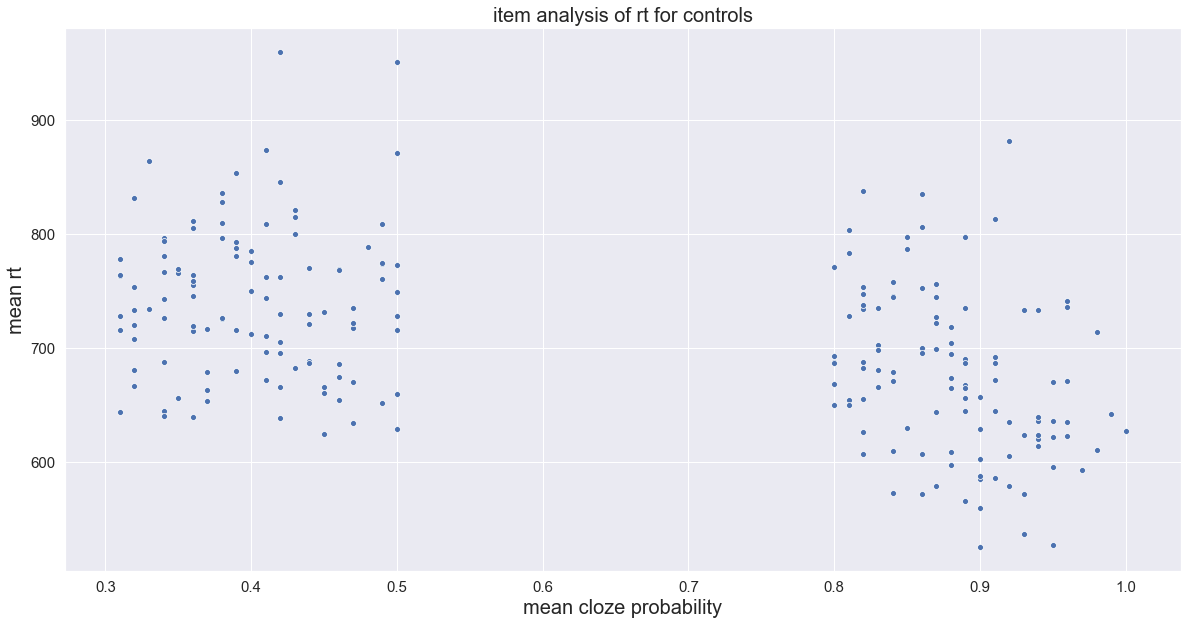

In [82]:
sns.set(rc={'figure.figsize':(20,10)})

sns.scatterplot(x="cloze_probability_mean_control", y="rt_mean_control", data=grouped_table)
plt.xlabel('mean cloze probability', fontsize=20)
plt.ylabel('mean rt', fontsize=20)
plt.title('item analysis of rt for controls', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15);

plt.show()

In [ ]:
df.columns

In [91]:
df = df.query('correct==1 and trial_type=="meaningful"')
grouped_table = pd.pivot_table(df, values=['rt', 'cloze_probability'], index=['spreadsheet_row','participant_id'], columns=['group'],
                         aggfunc= {np.mean, np.std}).reset_index()
# join multilevel columns
grouped_table.columns = ["_".join(pair) for pair in grouped_table.columns]
grouped_table.columns = grouped_table.columns.str.strip('_')
grouped_table

,spreadsheet_row,participant_id,cloze_probability_mean_control,cloze_probability_mean_patient,cloze_probability_std_control,rt_mean_control,rt_mean_patient,rt_std_control
0,29.0,sAA,0.38,NaN,0.0,771.5725,NaN,22.560242
1,29.0,sAA1,NaN,0.38,NaN,NaN,1277.315000,NaN
2,29.0,sAA2,NaN,0.38,NaN,NaN,1404.995000,NaN
3,29.0,sAE,0.38,NaN,NaN,645.4800,NaN,NaN
4,29.0,sAI2,NaN,0.38,NaN,NaN,1177.825000,NaN
5,29.0,sAM1,NaN,0.38,NaN,NaN,633.320000,NaN
6,29.0,sDH,0.38,NaN,NaN,865.0000,NaN,NaN
7,29.0,sEA,NaN,0.38,NaN,NaN,1011.560000,NaN
8,29.0,sEE,0.38,NaN,NaN,857.9350,NaN,NaN
9,29.0,sEE2,0.38,NaN,NaN,960.9600,NaN,NaN


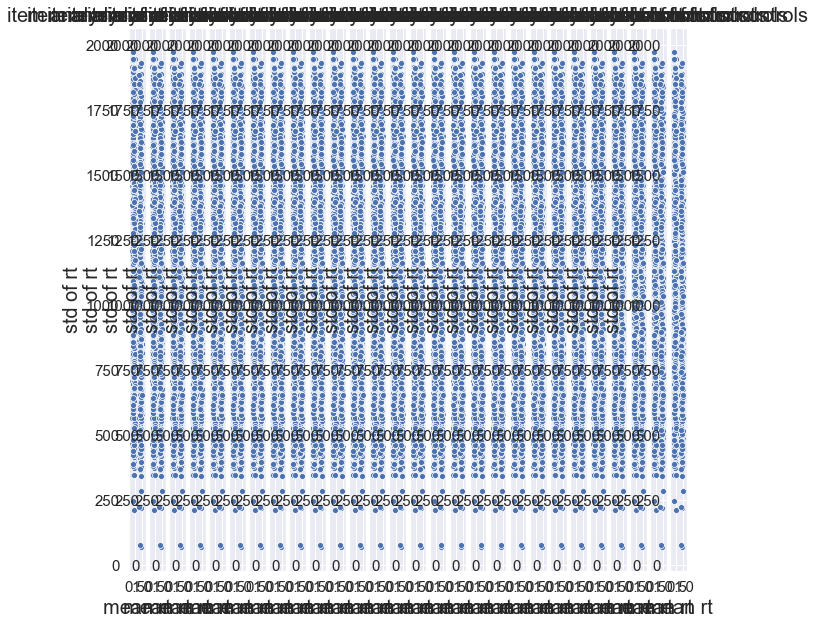

In [94]:
fig = plt.figure(figsize=(10,10))

participants = df['participant_id'].unique()

for i, participant in enumerate(participants):
    
    fig.add_subplot(1, len(participants), i+1)

    sns.scatterplot(x="cloze_probability", y="rt", data=df)
    plt.xlabel('mean rt', fontsize=20)
    plt.ylabel('std of rt', fontsize=20)
    plt.title('item analysis of rt for controls', fontsize=20)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 15);

plt.show()

#look at group first

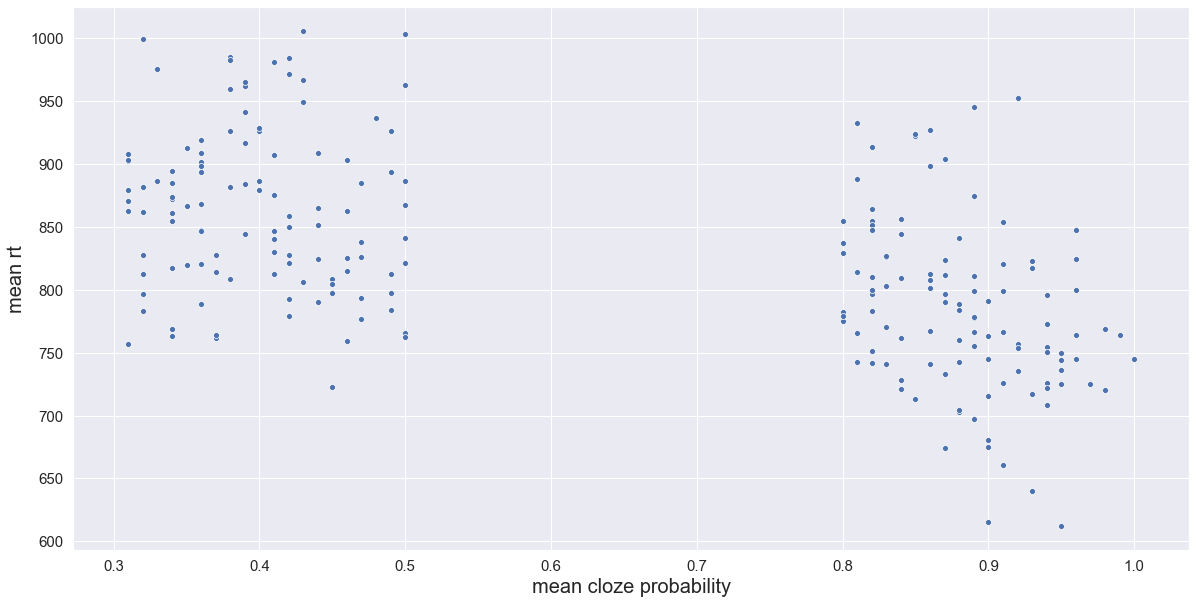

In [73]:
sns.set(rc={'figure.figsize':(20,10)})

sns.scatterplot(x = df.groupby('spreadsheet_row')['cloze_probability'].mean(), y = df.groupby('spreadsheet_row')['rt'].mean())
plt.xlabel('mean cloze probability', fontsize=20)
plt.ylabel('mean rt', fontsize=20)
plt.title('', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15);

plt.show()